In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Car_Project/Car%20details%20v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.shape

(8128, 13)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [ ]:
import re

In [ ]:
def carname(name):
  if re.match("Maruti",name):return "Maruti"
  elif re.match("Honda",name): return "Honda"
  elif re.match("Toyota",name): return "Toyota"
  elif re.match("Mercedes",name): return "Mercedes"
  elif re.match("Tata",name): return "Tata"
  elif re.match("Jeep",name): return "Jeep"
  elif re.match("Hyundai",name): return "Hyundai"
  elif re.match("Fiat",name): return "Fiat"
  elif re.match("Chevrolet",name): return "Chevrolet"
  elif re.match("Mahindra",name): return "Mahindra"
  elif re.match("Skoda",name): return "Skoda"
  elif re.match("Renault",name): return "Renault"
  elif re.match("Ford",name): return "Ford"
  else: return "Other Cars"

In [ ]:
df['name'] = df.name.apply(carname)

In [ ]:
len(df.name.unique())

14

In [ ]:
df.name.value_counts()

Maruti        2448
Hyundai       1415
Mahindra       772
Tata           734
Other Cars     712
Toyota         488
Honda          467
Ford           397
Chevrolet      230
Renault        228
Skoda          105
Mercedes        54
Fiat            47
Jeep            31
Name: name, dtype: int64

In [ ]:
df.year.unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [ ]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
from numpy.core.numeric import NaN
def integer(val):
  z = re.match("[0-9.]+",str(val));
  if z: return str(z.group())
  else: return NaN

In [ ]:
df.mileage = df.mileage.apply(integer)

In [ ]:
df['mileage'] = df['mileage'].astype(float)

In [ ]:
df.mileage.fillna(df.mileage.mean(),inplace=True)

In [ ]:
df.engine = df.engine.apply(integer)

In [ ]:
df.engine.fillna(df.engine.value_counts().index[0],inplace=True)

In [ ]:
df['engine'] = df['engine'].astype(int)

In [ ]:
df.engine.unique()

array([1248, 1498, 1497, 1396, 1298, 1197, 1061,  796, 1364, 1399, 1461,
        993, 1198, 1199,  998, 1591, 2179, 1368, 2982, 2494, 2143, 2477,
       1462, 2755, 1968, 1798, 1196, 1373, 1598, 1998, 1086, 1194, 1172,
       1405, 1582,  999, 2487, 1999, 3604, 2987, 1995, 1451, 1969, 2967,
       2497, 1797, 1991, 2362, 1493, 1599, 1341, 1794,  799, 1193, 2696,
       1495, 1186, 1047, 2498, 2956, 2523, 1120,  624, 1496, 1984, 2354,
        814,  793, 1799,  936, 1956, 1997, 1499, 1948, 2997, 2489, 2499,
       2609, 2953, 1150, 1994, 1388, 1527, 2199,  995, 2993, 1586, 1390,
        909, 2393, 3198, 1339, 2835, 2092, 1595, 2496, 1596, 1597, 2596,
       2148, 1299, 1590, 2231, 2694, 2200, 1795, 1896, 1796, 1422, 1489,
       2359, 2197, 2999, 1781, 2650, 1343, 2446, 3498, 2198, 2776, 1950])

In [ ]:
df.engine.value_counts().index[0]

1248

In [ ]:
df.max_power = df.max_power.apply(integer)

In [ ]:
df['max_power'] = df['max_power'].astype(float)

In [ ]:
df.max_power.fillna(df.max_power.mean(),inplace=True)

In [ ]:
df.max_power.unique()

array([ 74.        , 103.52      ,  78.        ,  90.        ,
        88.2       ,  81.86      ,  57.5       ,  37.        ,
        67.1       ,  68.1       , 108.45      ,  60.        ,
        73.9       ,  91.51791898,  67.        ,  82.        ,
        88.5       ,  46.3       ,  88.73      ,  64.1       ,
        98.6       ,  88.8       ,  83.81      ,  83.1       ,
        47.3       ,  73.8       ,  34.2       ,  35.        ,
        81.83      ,  40.3       , 121.3       , 138.03      ,
       160.77      , 117.3       , 116.3       ,  83.14      ,
        67.05      , 168.5       , 100.        , 120.7       ,
        98.63      , 175.56      , 103.25      , 171.5       ,
       100.6       , 174.33      , 187.74      , 170.        ,
        78.9       ,  88.76      ,  86.8       , 108.495     ,
       108.62      ,  93.7       , 103.6       ,  98.59      ,
       189.        ,  67.04      ,  68.05      ,  58.2       ,
        82.85      ,  81.8       ,  73.        , 120.  

In [ ]:
df.torque[:5]

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [ ]:
integer("190Nm@ 2000rpm")

'190'

In [ ]:
df.torque = df.torque.apply(integer)

In [ ]:
df['torque'] = df['torque'].astype(float)

In [ ]:
df.torque.fillna(df.torque.mean(),inplace=True)

In [ ]:
df.torque.unique()

array([190.        , 250.        ,  12.7       ,  22.4       ,
        11.5       , 113.75      ,   7.8       ,  59.        ,
       170.        , 160.        , 248.        ,  78.        ,
       168.29414116,  84.        , 115.        , 200.        ,
        62.        , 219.7       , 114.        ,  69.        ,
       172.5       ,   6.1       , 114.7       ,  60.        ,
        90.        , 151.        , 104.        , 320.        ,
       145.        , 146.        , 343.        , 400.        ,
       138.        , 360.        , 380.        , 173.        ,
       111.7       , 219.6       , 112.        , 130.        ,
       205.        , 280.        ,  99.04      ,  77.        ,
       110.        , 153.        , 113.7       , 113.        ,
       101.        , 290.        , 120.        ,  96.        ,
       135.        , 259.8       , 259.9       ,  91.        ,
        96.1       , 109.        , 202.        , 430.        ,
       347.        , 382.        , 620.        , 500.  

In [ ]:
df.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [ ]:
df.seats.fillna(df.seats.value_counts().index[0],inplace=True)

In [ ]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   int64  
 10  max_power      8128 non-null   float64
 11  torque         8128 non-null   float64
 12  seats          8128 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 825.6+ KB


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


#comparing selling price from buying from individual or by dealer based on model
# Which seller type models sold more based on car brand
  -4.5L : individual: swift
  -5L : dealer : honda

In [ ]:
sellertype = df.groupby(['name','seller_type']).agg({'selling_price':'sum'}).reset_index()

In [ ]:
sellertype

,name,seller_type,selling_price
0,Chevrolet,Dealer,3388000
1,Chevrolet,Individual,59601520
2,Fiat,Dealer,615000
3,Fiat,Individual,13299998
4,Ford,Dealer,45799998
5,Ford,Individual,158697987
6,Ford,Trustmark Dealer,625000
7,Honda,Dealer,63210998
8,Honda,Individual,170970135
9,Honda,Trustmark Dealer,44234000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


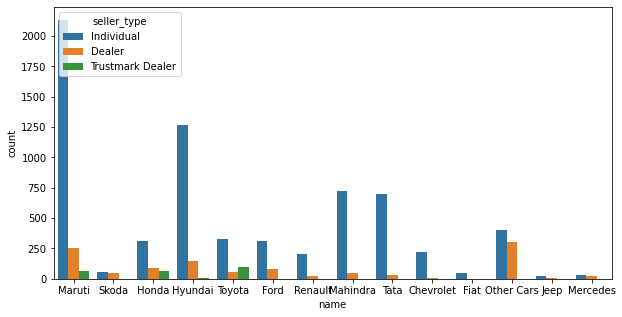

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['name'],hue=df['seller_type'])

- Maruti brand with individual seller type will be maximum sold

# how car price differ from car torque and speed based on model
  -8L : 25nm- 2500rpm : kia
  -6L : 150nm- 3000rpm : benz

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


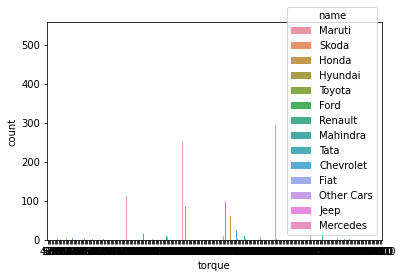

In [ ]:
sns.countplot(df['torque'],hue=df['name'])

In [ ]:
torque = df.groupby(['name','torque']).agg({'selling_price':'sum'}).reset_index()

In [ ]:
sns.barplot(data=torque,x='torque',y='selling')

ValueError: ignored

#cost of the car will vary depend on transmission type and model.
  -10L : Automative : bmw
  -9L : Manual :hundai

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


In [ ]:
trnstype = df.groupby(['name','transmission']).agg({'selling_price':'sum'}).reset_index()
trnstype.head()

,name,transmission,selling_price
0,Chevrolet,Automatic,5255000
1,Chevrolet,Manual,57734520
2,Fiat,Manual,13914998
3,Ford,Automatic,26437000
4,Ford,Manual,178685985


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


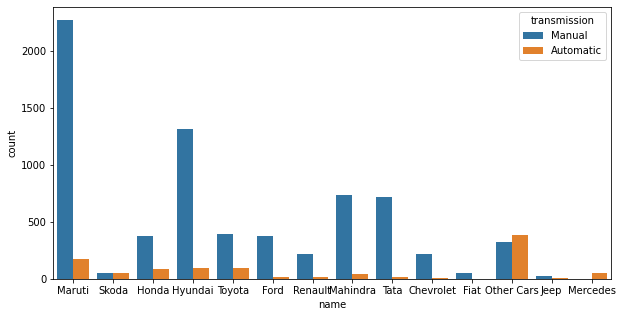

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['name'],hue=df['transmission'])

- Maruti brand with manual type sold more compare to others

#is that car price reducing depend on year and type
  -4L : 2014: honda
  -3L : 2013: kia

In [ ]:
pricecar = df.groupby(['name','year']).agg({'selling_price':'sum'}).reset_index()
pricecar.head()

,name,year,selling_price
0,Chevrolet,2005,160000
1,Chevrolet,2006,415000
2,Chevrolet,2007,779000
3,Chevrolet,2008,1215527
4,Chevrolet,2009,1930000


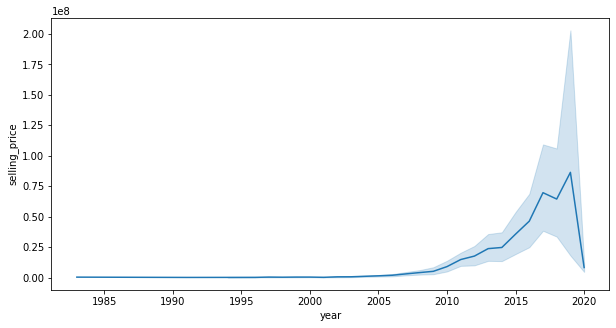

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data= pricecar,x='year',y='selling_price')

- As you can see the trend car model age(year) increasing than selling price of the car reducing

#what is the milage depend on hp and engine type
  -20kmpl : 70bhp- 1200cc
  -15kmpl : 60bhp- 1100cc

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


In [ ]:
mileage = df.groupby('name').agg({'engine':'count','mileage':'mean'})
mileage.head()

,engine,mileage
name,,
Chevrolet,230,18.437174
Fiat,47,19.447079
Ford,397,19.984632
Honda,467,19.735586
Hyundai,1415,19.792956


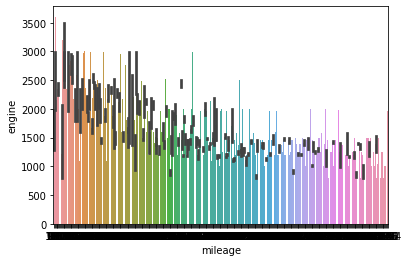

In [ ]:
sns.barplot(data=df,x='mileage',y='engine')

#life span of the cars based on owner type


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


In [ ]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
#ownerdf = df[df['owner']=='Fourth & Above Owner']
ownerdf = df[df['owner'].isin(['Fourth & Above Owner','Third Owner'])]
ownerdf.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.0,12.7,5.0
62,Hyundai,2011,190000,110000,Petrol,Individual,Manual,Third Owner,20.36,1197,78.9,111.7,5.0
65,Ford,2017,600000,25000,Petrol,Individual,Manual,Third Owner,18.16,1196,86.8,112.0,5.0
98,Maruti,2008,120000,68000,Petrol,Dealer,Manual,Third Owner,19.70,796,46.3,62.0,5.0
103,Maruti,2016,270000,100000,Petrol,Individual,Manual,Third Owner,15.37,1196,73.0,101.0,7.0


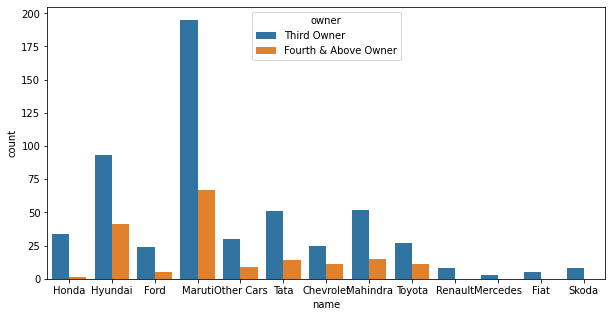

In [ ]:
plt.figure(figsize=(10,5))
#sns.countplot(ownerdf['name'],hue=ownerdf['owner'])
sns.countplot(data=ownerdf,
              x='name',
              hue='owner',
              )

- Maruti brand has more lifespan as compare to others

#Which model of car sold max in based on fuel type since last year.

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


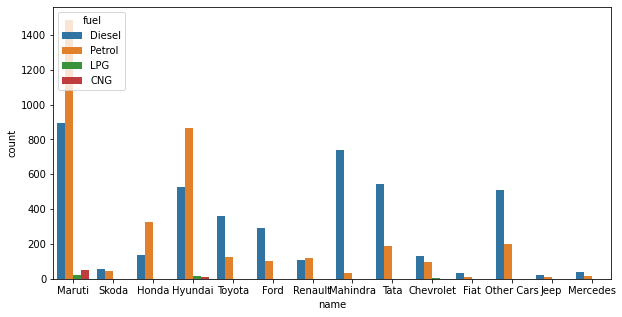

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['name'],hue=df['fuel'])

- Maruti brand sold maximum with petrol since last year

#which model of the car sold max in last year(assumption).


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


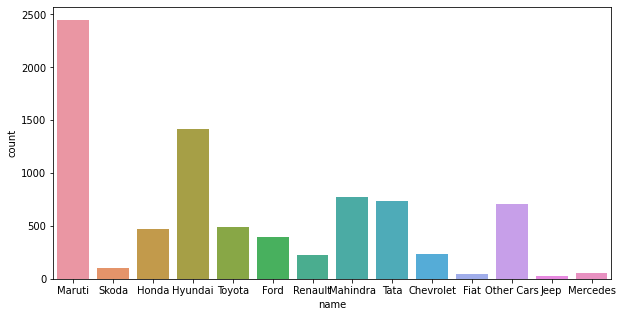

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['name'])

- Maruti model sold maximum from last year

#Average selling car price depend on owner type and how much km driven

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5,5.0
